A simple project that hopes to analyze the influence of each variable of the data on student's performance. This is an Exploratory Data Analysis that hopes to employ the use of pandas, numpy and the matplotlib/seaborn library.

In [31]:
#import all the libraries that will be utilized for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#import the data that will be used for this project into a data frame.
df = pd.read_csv("StudentsPerformance.csv")
df.head() #Show the first 5 rows 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
df.shape

(1000, 8)

The data imported into the data frame, has a `1000` rows and `8` columns by default. The `df.shape` method helps us understand the range of data we will be working with. Hence it is our job to understand the impact of each of the columns and know their implication towards the overall datasets.

We are going to drop the `lunch` and `test preparation course` column since we would not be using them for our analysis. The reason for this decision is due to the fact that they do not contribute enough impact to our analysis, hence the reason they have to be discarded for this project.

In [34]:
df.drop(['lunch','test preparation course'], axis=1, inplace=True)
df # ran just to confirm the implemented changes

,gender,race/ethnicity,parental level of education,math score,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,some college,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,some college,76,78,75
...,...,...,...,...,...,...
995,female,group E,master's degree,88,99,95
996,male,group C,high school,62,55,55
997,female,group C,high school,59,71,65
998,female,group D,some college,68,78,77


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   math score                   1000 non-null   int64 
 4   reading score                1000 non-null   int64 
 5   writing score                1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


All columns have complete number of rows for each entry, hence there is no need for any form of data cleaning due to the fact that most of the data entered are properly formated without any null values. This greatly reduces the workload involved in cleaning and processing the data. Hence proceed to the next step.

In [36]:
df.describe() #This is just to give us an overview of the statistics of the dataframe we would be working with.

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Create a new column where you find out the total score for the exams taken for each of the students. This is to have a more holistic understanding of each student's performance.

In [43]:
df['total'] = df['math score'] + df['reading score'] + df['writing score']
df['percentage'] = round((df['total']/300) * 100,2) 
# we can also consider the percentage in this case as the mean of the scores for all the subjects taken.
df.head()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,percentage,total
0,female,group B,bachelor's degree,72,72,74,72.67,218
1,female,group C,some college,69,90,88,82.33,247
2,female,group B,master's degree,90,95,93,92.67,278
3,male,group A,associate's degree,47,57,44,49.33,148
4,male,group C,some college,76,78,75,76.33,229


In an effort to create a more detailed classification, I would grade the performance of the students based on the score given. `80-100` is for `excellent`, `70-80` is for `Very good`, `60-70` is for `good`, `50-60` is for `pass` while anything below 50 will be classified as `fail`.  

In [45]:
graded_df = df.copy()
def grader(graded_df): # create a fuction to grade the scores passed into it. This is done due to the fact it will be repeated.
    grade = pd.Series([],dtype=pd.StringDtype()) 
    for i in range(len(graded_df)):
        if graded_df[i] >= 80:
            grade[i]="Excellent"
        elif graded_df[i] >= 70:
            grade[i]="Very good"
        elif graded_df[i] >= 60:
            grade[i]="Good"
        elif graded_df[i] >= 50:
            grade[i]="Pass"
        else:
            grade[i]="Fail"
    return grade
'''
the extra detail (dtype=pd.StringDtype()) is meant to remove a warnig with regards 
to the pandas Series not being specified as an object
'''

math_grade = grader(graded_df['math score'])
reading_grade = grader(graded_df['reading score'])
writing_grade = grader(graded_df['writing score'])

graded_df.insert(6,"math_grade",math_grade)
graded_df.insert(8,"reading_grade",reading_grade)
graded_df.insert(10,"writing_grade",writing_grade)


graded_df['final grade'] = np.where(df.total > 150, 'Pass', 'Fail')
graded_df.sample(10)

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,math_grade,percentage,reading_grade,total,writing_grade,final grade
652,female,group D,some college,85,86,98,Excellent,89.67,Excellent,269,Excellent,Pass
331,male,group C,associate's degree,47,37,35,Fail,39.67,Fail,119,Fail,Fail
318,male,group B,bachelor's degree,63,71,69,Good,67.67,Very good,203,Good,Pass
779,male,group E,associate's degree,94,85,82,Excellent,87.00,Excellent,261,Excellent,Pass
380,female,group B,associate's degree,80,86,83,Excellent,83.00,Excellent,249,Excellent,Pass
709,female,group D,associate's degree,42,61,58,Fail,53.67,Good,161,Pass,Pass
734,female,group E,some college,53,58,57,Pass,56.00,Pass,168,Pass,Pass
909,male,group E,bachelor's degree,70,64,70,Very good,68.00,Good,204,Very good,Pass
298,male,group C,high school,40,46,50,Fail,45.33,Fail,136,Pass,Fail
166,male,group C,high school,53,51,51,Pass,51.67,Pass,155,Pass,Pass


### Create another dataframe that has only grades. 

This dataframe will be used later on

In [ ]:
student_grade = graded_df.iloc[:,:4]
student_grade['math grade'] = graded_df['math_grade']
student_grade['reading grade'] = graded_df['reading_grade']
student_grade['writing grade'] = graded_df['writing_grade']
student_grade['final grade'] = graded_df['final grade']


student_grade.head()

The `student_grade` dataframe will be used later when answering questions in order for us to properly understand the number of students that fall into each individual category.

In [48]:
import seaborn as sns #import seaborn library to be used hand in hand with matplotlib.
sns.set_style('darkgrid')

In [46]:
#Setting the initial parameters for our plots.
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.facecolor'] = '#00000000'

# Questions to ask about the project

## 1. What ethnic group significantly did well overall, and in what subject?

With each question answered, we hope to visualize them in order to give a more visceral understanding what the data is saying. The first step of exploring the influence of ethnicity on the student's performance is to first get the population.

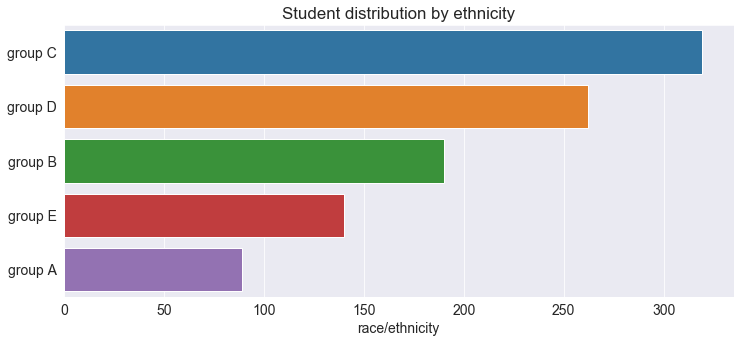

In [53]:
ethnic_count = df['race/ethnicity'].value_counts()

plt.figure(figsize=(12,5))
plt.title('Student distribution by ethnicity')
plt.xlabel('Number of students')
sns.barplot(x=ethnic_count,y=ethnic_count.index);

From the visualization above, it is easy to see that the class is dominated in size by `group C`, followed by `group D` until you find `group A` at the bottom of the representation.

### Exercise: Group the student performance by ethnic group.

I will be asking 3 major 3 questions under the main question of the impact of ethnicity on student performance.
1. **What ethic group/race did the best in each subject**
2. **What ethic group/race did the worst in each subject**
3. **What ethic group/race passed overall**


In [ ]:
ethnic_groupm = df[df['math score'] > 50].groupby('race/ethnicity')['math score'].count() 
# number of students that passed the math exam based on ethnicity.
ethnic_groupr = df[df['reading score'] > 50].groupby('race/ethnicity')['reading score'].count()
# number of students that passed the reading exam based on ethnicity.
ethnic_groupw = df[df['writing score'] > 50].groupby('race/ethnicity')['writing score'].count()
# number of students that passed the writing exam based on ethnicity.


The first order of business is to create a representative selection of the students for each category, due to the fact that `group C` is disproportionately larger in size compared to other groups like `group A`. In order to account for the discrepancy in population, we would take a random sample of `70 students` from each ethnic group. `70` is an appropriate number since all the ethnic groups have at least *70*.  

We have to visualize the results of how each ethnic group performed. Even though most of them are from `group C`, hence there will be a disparity with the representation in student performance.

In [56]:
ethnic_groupm50 = df[df['math score'] > 50].sample(70).groupby('race/ethnicity')['math score'].count()
ethnic_groupr50 = df[df['reading score'] > 50].sample(70).groupby('race/ethnicity')['reading score'].count()
ethnic_groupw50 = df[df['writing score'] > 50].sample(70).groupby('race/ethnicity')['writing score'].count()

#.sample selected 70 random students that met the pass criteria (scores above 50) for each of the subjects.

We then proceed to visualize the groups as they took the examination for the individual subjects (`Maths`,`reading`,`writing`).

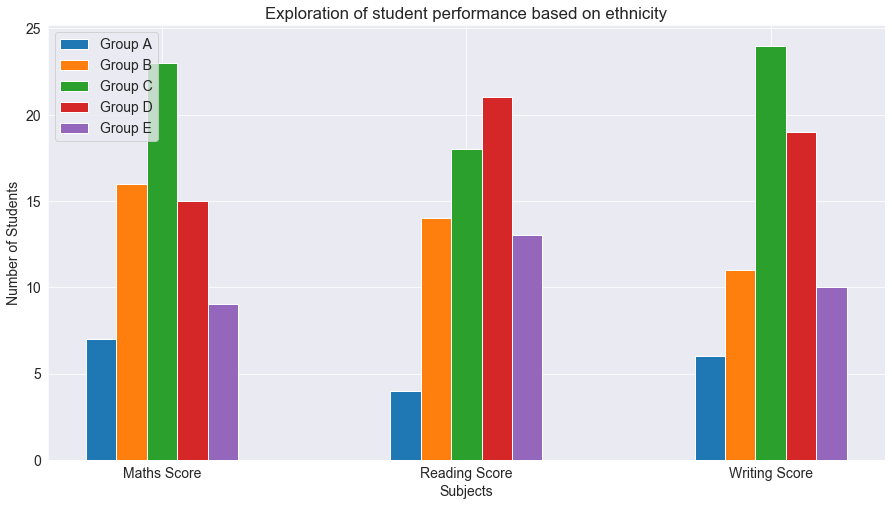

In [57]:
# Numbers of pairs of bars to be considered
N = 3

# Specify the values of each of the bars, and initialize their respective variables.
groupA_bar = (ethnic_groupm50['group A'], ethnic_groupr50['group A'], ethnic_groupw50['group A'])
groupB_bar = (ethnic_groupm50['group B'], ethnic_groupr50['group B'], ethnic_groupw50['group B'])
groupC_bar = (ethnic_groupm50['group C'], ethnic_groupr50['group C'], ethnic_groupw50['group C'])
groupD_bar = (ethnic_groupm50['group D'], ethnic_groupr50['group D'], ethnic_groupw50['group D'])
groupE_bar = (ethnic_groupm50['group E'], ethnic_groupr50['group E'], ethnic_groupw50['group E'])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,8))

# Width of a bar 
width = 0.1       

# Plotting
plt.bar(ind, groupA_bar , width, label='Group A')
plt.bar(ind + 0.1, groupB_bar, width, label='Group B')
plt.bar(ind + 0.2, groupC_bar, width, label='Group C')
plt.bar(ind + 0.3, groupD_bar, width, label='Group D')
plt.bar(ind + 0.4, groupE_bar, width, label='Group E')

plt.xlabel('Subjects')
plt.ylabel('Number of Students')
plt.title('Exploration of student performance based on ethnicity')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width *2, ('Maths Score', 'Reading Score', 'Writing Score'))

#Display the legend for each ethnic group represented
plt.legend();


From this visualization, it is easy to see that `group C` was the overall best in all the exams given. Second to `group D`. `Group B` is quite an interesting group, because they were the third best in `Maths and reading`, but were below `group E` in writing. `Group A` is very peculiar as well, as they were the race with the least performance in all subjects except `maths`.

##  2. What gender topped the examinations and where did each gender excel in the most?

In this section, we hope to compare and contrast the performance of students on various subjects based on their gender. We will basically talk about how the students performed generally with gender being the focus.

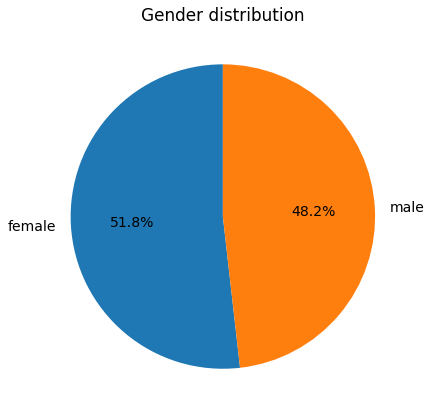

In [26]:
gender_count = df.gender.value_counts()
plt.figure(figsize=(12,7))
plt.title('Gender distribution')
plt.pie(gender_count, labels = gender_count.index,autopct='%1.1f%%' ,startangle=90);

From what we can gather, the females are higher in population for this dataset.

We then proceed to understand what percentage of students passed based on their gender for each of the subjects.

In [27]:
gender_groupm = df[df['math score'] > 50].groupby('gender')['math score'].count() 
gender_groupr = df[df['reading score'] > 50].groupby('gender')['reading score'].count()
gender_groupw = df[df['writing score'] > 50].groupby('gender')['writing score'].count()

We then continue our exploration by visualizing the data on a bar chart in order to properly what gender did better in each subject taken during the examination.

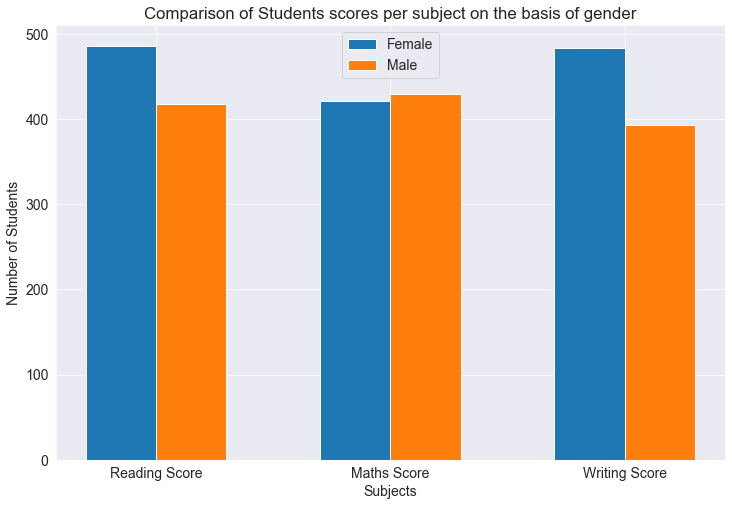

In [60]:
# Numbers of pairs of bars to be considered
N = 3

# Data on X-axis

# Specify the values of blue bars (height)
female_bar = (gender_groupr['female'], gender_groupm['female'], gender_groupw['female'])
# Specify the values of orange bars (height)
male_bar = (gender_groupr['male'], gender_groupm['male'], gender_groupw['male'])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,8))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, female_bar , width, label='Female')
plt.bar(ind + width, male_bar, width, label='Male')

plt.xlabel('Subjects')
plt.ylabel('Number of Students')
plt.title('Comparison of Students scores per subject on the basis of gender')

plt.xticks(ind + width/2, ('Reading Score', 'Maths Score', 'Writing Score'))

# Finding the best position for legends and putting it
plt.legend();

From what we can tell from the above chart, the male students were beaten in the subjects except mathematics. The male population passed by only a slight margin in this case.

## 3. What was the overall effect of parental level of education on Student's performance

First thing's first is to try and get a sense of what the population of the students are, based on their `parent's level of education`.

In [ ]:
parent_ed = df['parental level of education'].value_counts()

plt.figure(figsize=(12,7))
plt.xlabel('Level of education')
plt.xticks(rotation=45)
sns.barplot(x= parent_ed.index,y=parent_ed);

It would seem as though the majority of the Students are represented by mostly parents that went to `some college`, while the least represented are the the students with parents that have `master's degree`. We have to take a sample of **50 students** due to the fact that there is a disparity in the number of students that represent each category.

In [63]:
parent_groupm50 = df[df['math score'] > 50].sample(50).groupby('parental level of education')['math score'].count()
parent_groupr50 = df[df['reading score'] > 50].sample(50).groupby('parental level of education')['reading score'].count()
parent_groupw50 = df[df['writing score'] > 50].sample(50).groupby('parental level of education')['writing score'].count()

Time to visualize our findings on a bar chart in order to see the average performance of students on the basis of `parental educational background`.

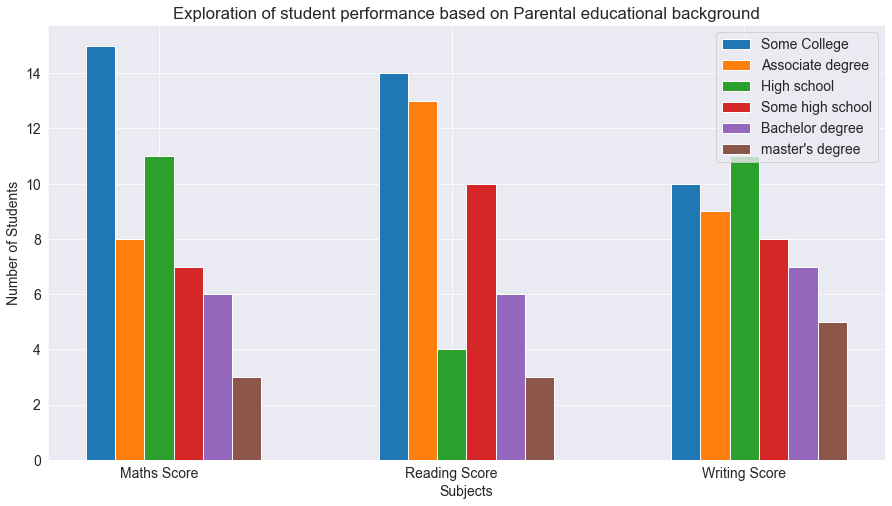

In [64]:
# Numbers of pairs of bars to be considered
N = 3

# Specify the values of each of the bars, and initialize their respective variables.
somecol_bar = (parent_groupm50['some college'], parent_groupr50['some college'], parent_groupw50['some college'])
asso_bar = (parent_groupm50["associate's degree"], parent_groupr50["associate's degree"], parent_groupw50["associate's degree"])
high_bar = (parent_groupm50['high school'], parent_groupr50['high school'], parent_groupw50['high school'])
somehigh_bar = (parent_groupm50['some high school'], parent_groupr50['some high school'], parent_groupw50['some high school'])
bachelor_bar = (parent_groupm50["bachelor's degree"], parent_groupr50["bachelor's degree"], parent_groupw50["bachelor's degree"])
masters_bar = (parent_groupm50["master's degree"], parent_groupr50["master's degree"], parent_groupw50["master's degree"])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,8))

# Width of a bar 
width = 0.1       

# Plotting
plt.bar(ind, somecol_bar , width, label='Some College')
plt.bar(ind + 0.1, asso_bar, width, label='Associate degree')
plt.bar(ind + 0.2, high_bar, width, label='High school')
plt.bar(ind + 0.3, somehigh_bar, width, label='Some high school')
plt.bar(ind + 0.4, bachelor_bar, width, label='Bachelor degree')
plt.bar(ind + 0.5, masters_bar, width, label="master's degree")

plt.xlabel('Subjects')
plt.ylabel('Number of Students')
plt.title('Exploration of student performance based on Parental educational background')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width *2, ('Maths Score', 'Reading Score', 'Writing Score'))

plt.legend();


From what is observed, it wouls seem as though the students with parents that have `some college degree` passed the most in all the subjects except `writing` where they emerged the second highest. For some odd reason, students that have parents with `master's degree` seem to have the least numbers in the population of students that passed each of the examinations taken. Another interesting thing to note is that students that had parents with a `high school degree` had the highest number in `writing`, the second highest in `math` but the lowest number in `reading`. The `bachelor` and `master degree` category were consistently low throughout, and hence there needs to be attention given to the kids.

In the next exploration, we have to use the `student graded`dataframe for this analysis in order for us to properly analyze the number of students that attained the various level of grades.

In [71]:
graded_parentsm = student_grade.groupby('parental level of education')['math grade'].value_counts()
graded_parentsr = student_grade.groupby('parental level of education')['reading grade'].value_counts()
graded_parentsw = student_grade.groupby('parental level of education')['writing grade'].value_counts()



## Summary of the grades for Math, based on the parental level of education.

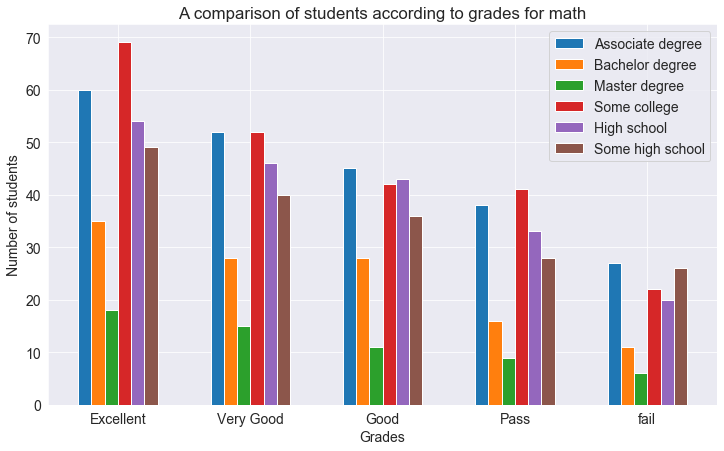

In [75]:
N = 5

ind = np.arange(N)

plt.figure(figsize=(12,7))

assoc_bar = graded_parentsm["associate's degree"]
bach_bar = graded_parentsm["bachelor's degree"]
master_bar = graded_parentsm["master's degree"]
somcol_bar = graded_parentsm["some college"]
high_bar = graded_parentsm["high school"]
somehigh_bar = graded_parentsm["some high school"]

width = 0.1
plt.title('A comparison of students according to grades for math')
plt.xlabel('Grades')
plt.ylabel('Number of students')


plt.bar(ind,assoc_bar,width,label='Associate degree')
plt.bar(ind+0.1,bach_bar,width,label='Bachelor degree')
plt.bar(ind+0.2,master_bar,width,label='Master degree')
plt.bar(ind+0.3,somcol_bar,width,label='Some college')
plt.bar(ind+0.4,high_bar,width,label='High school')
plt.bar(ind+0.5,somehigh_bar,width,label='Some high school')

plt.xticks(ind+width*2.5,('Excellent','Very Good','Good','Pass','fail'))

plt.legend();

A summary of the chart above is that students that have parents with `some college` degree did very well in mathemtics. While student's with parents that have `master's degree` weren't excelling for most of the graded categories. The highest number of failures stemmed from the student's that had parents with `associate degrees`

## Summary of the grades for reading, based on the parental level of education.

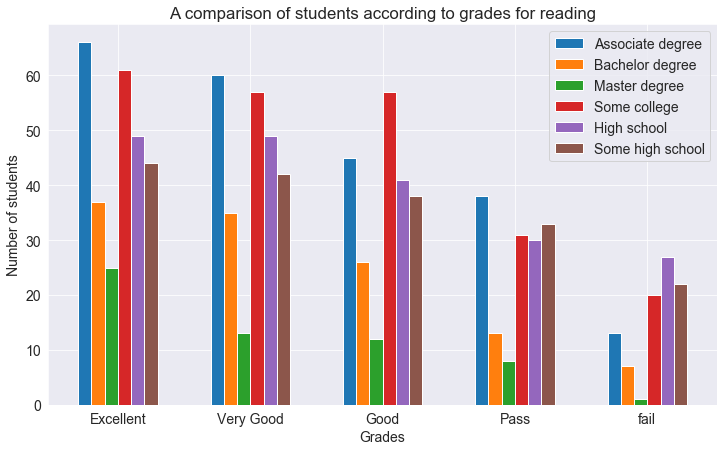

In [74]:
N = 5

ind = np.arange(N)

plt.figure(figsize=(12,7))

assoc_bar = graded_parentsr["associate's degree"]
bach_bar = graded_parentsr["bachelor's degree"]
master_bar = graded_parentsr["master's degree"]
somcol_bar = graded_parentsr["some college"]
high_bar = graded_parentsr["high school"]
somehigh_bar = graded_parentsr["some high school"]

width = 0.1
plt.title('A comparison of students according to grades for reading')
plt.xlabel('Grades')
plt.ylabel('Number of students')


plt.bar(ind,assoc_bar,width,label='Associate degree')
plt.bar(ind+0.1,bach_bar,width,label='Bachelor degree')
plt.bar(ind+0.2,master_bar,width,label='Master degree')
plt.bar(ind+0.3,somcol_bar,width,label='Some college')
plt.bar(ind+0.4,high_bar,width,label='High school')
plt.bar(ind+0.5,somehigh_bar,width,label='Some high school')

plt.xticks(ind+width*2.5,('Excellent','Very Good','Good','Pass','fail'))

plt.legend();

A summary of the chart above is that students that have parents with `associate degree` did very well in reding. While student's with parents that have `master's degree` weren't excelling for most of the graded categories. The highest number of failures emerged from the student's that had parents with `high school`

## Summary of the grades for writing, based on the parental level of education.

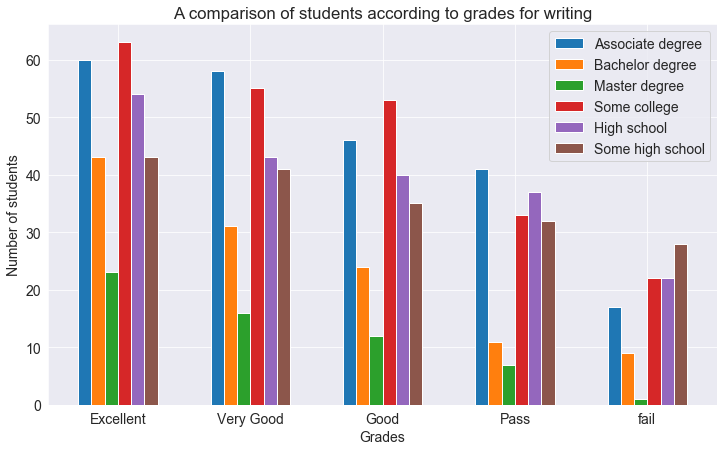

In [76]:
N = 5

ind = np.arange(N)

plt.figure(figsize=(12,7))

assoc_bar = graded_parentsw["associate's degree"]
bach_bar = graded_parentsw["bachelor's degree"]
master_bar = graded_parentsw["master's degree"]
somcol_bar = graded_parentsw["some college"]
high_bar = graded_parentsw["high school"]
somehigh_bar = graded_parentsw["some high school"]

width = 0.1
plt.title('A comparison of students according to grades for writing')
plt.xlabel('Grades')
plt.ylabel('Number of students')


plt.bar(ind,assoc_bar,width,label='Associate degree')
plt.bar(ind+0.1,bach_bar,width,label='Bachelor degree')
plt.bar(ind+0.2,master_bar,width,label='Master degree')
plt.bar(ind+0.3,somcol_bar,width,label='Some college')
plt.bar(ind+0.4,high_bar,width,label='High school')
plt.bar(ind+0.5,somehigh_bar,width,label='Some high school')

plt.xticks(ind+width*2.5,('Excellent','Very Good','Good','Pass','fail'))

plt.legend();

A summary of the chart above is that students that have parents with `some college` degree did very well in mathemtics. While student's with parents that have `master's degree` weren't excelling for most of the graded categories. The highest number of failures stemmed from the student's that had parents with `some high school`

In conclusion for this section, student's with parent's that have `master's degree` need to encourage more to worker in order to attain better grades, while student's with parent's that have `some college` and `associate` degree need to be supported more and appreciated in order for them to maintain their amazing performance.

## 4. What was general performance of the class with regards to the individual subject

An initial understanding of the distribution of the student's scores would give us an insight to how the average performance of the class was.

In [ ]:
fig, axes = plt.subplots(3, figsize =(10,12))

sns.distplot(df["math score"],bins=[0,40,50,60,70,80,90,100], ax=axes[0])
sns.distplot(df["reading score"],bins=[0,40,50,60,70,80,90,100],color='red', ax=axes[1])
sns.distplot(df["writing score"],bins=[0,40,50,60,70,80,90,100],color='green', ax=axes[2]);

From what we can see from the above _histogram_, the scores are right skewed (there was almost no representation for those that score below 40). Hence the vast majority of the class passed. This can be confirmed by the bar chart below.

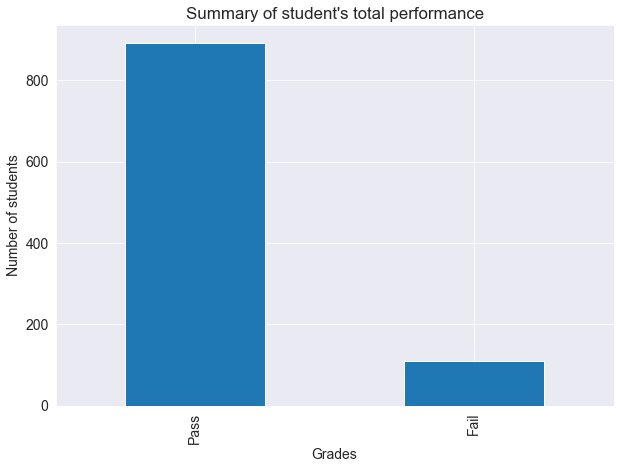

In [78]:
total_final = student_grade['final grade'].value_counts()
plt.figure(figsize=(10,7))
plt.xlabel('Grades') 
plt.ylabel('Number of students') 
plt.title("Summary of student's total performance")
total_final.plot(kind='bar');

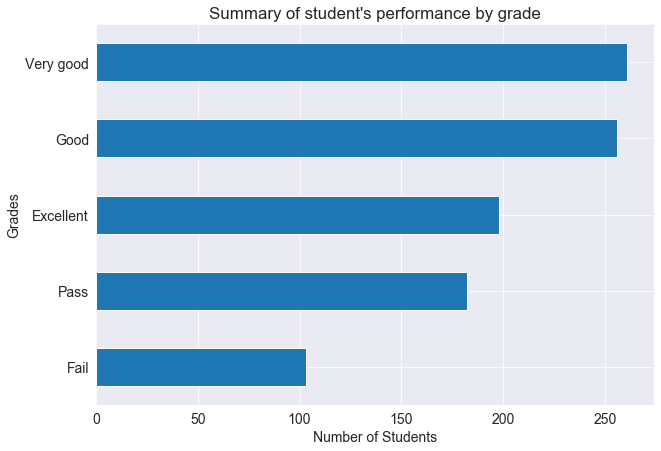

In [77]:
graded_sum = grader(graded_df['percentage'])
plt.figure(figsize=(10,7))
plt.rc('font',size=14)
plt.title("Summary of student's performance by grade")
plt.xlabel("Number of Students")
plt.ylabel("Grades")
graded_sum.value_counts().sort_values().plot(kind='barh');

We can also confirm that the vast majority of the class performed exceptionally well, with the highest frequency being the students that scored between `70-80`.

## A study on gender

In [79]:
gender_final = graded_df.groupby('gender')['final grade'].value_counts()
# create a pandas series that groups the final grades by gender

### Visualization of our finals on the total grade of the students based on gender.

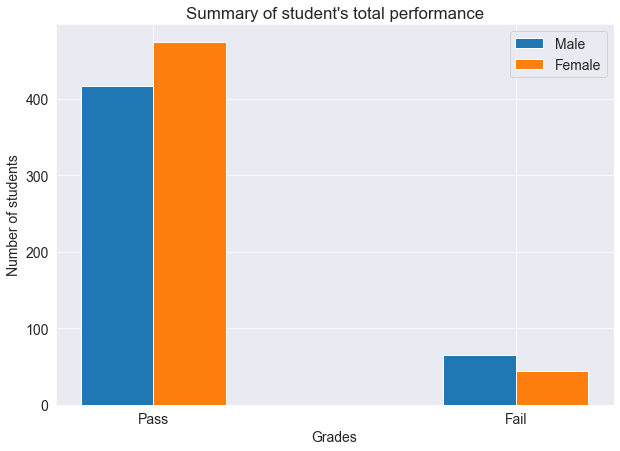

In [80]:
N = 2

ind = np.arange(N)

male_bar = gender_final['male']
female_bar = gender_final['female']

width = 0.2

plt.figure(figsize=(10,7))
plt.xlabel('Grades') 
plt.ylabel('Number of students') 
plt.title("Summary of student's total performance")

plt.bar(ind,male_bar,width,label='Male')
plt.bar(ind + width,female_bar,width,label='Female')


plt.xticks(ind+ width/2, ('Pass', 'Fail'))
plt.legend();

As expected, the female students passed more than the male students

## A study on ethnicity/race

In [83]:
ethnic_final = graded_df.groupby('race/ethnicity')['final grade'].value_counts()
# create a pandas series that groups the final grades by ethnicity/race

### Visualization of our finals on the total grade of the students based on Ethnicity.

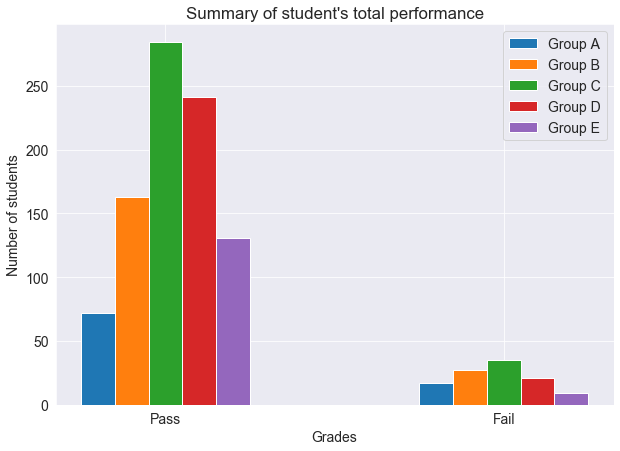

In [82]:
N = 2

ind = np.arange(N)

groupA_bar = ethnic_final['group A']
groupB_bar = ethnic_final['group B']
groupC_bar = ethnic_final['group C']
groupD_bar = ethnic_final['group D']
groupE_bar = ethnic_final['group E']


width = 0.1

plt.figure(figsize=(10,7))
plt.xlabel('Grades') 
plt.ylabel('Number of students') 
plt.title("Summary of student's total performance")

plt.bar(ind,groupA_bar,width,label='Group A')
plt.bar(ind + 0.1,groupB_bar,width,label='Group B')
plt.bar(ind + 0.2,groupC_bar,width,label='Group C')
plt.bar(ind + 0.3,groupD_bar,width,label='Group D')
plt.bar(ind + 0.4,groupE_bar,width,label='Group E')

plt.xticks(ind+ width*2, ('Pass', 'Fail'))
plt.legend();

This visualization seems to be heavily impacted by the population of the individual races/ethnic group.

## A study on Parental background

In [84]:
parental_final = graded_df.groupby('parental level of education')['final grade'].value_counts()
# create a pandas series that groups the final grades by parental background

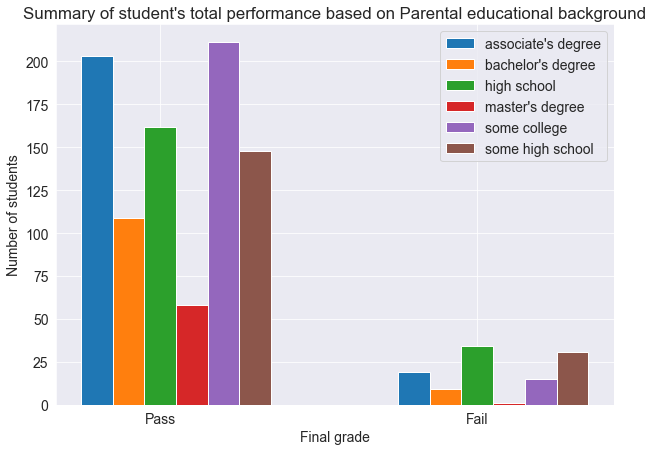

In [85]:
N = 2

ind = np.arange(N)

assoc_bar = parental_final["associate's degree"]
bach_bar = parental_final["bachelor's degree"]
high_bar = parental_final["high school"]
master_bar = parental_final["master's degree"]
somecol_bar = parental_final["some college"]
somehigh_bar = parental_final["some high school"]


width = 0.1

plt.figure(figsize=(10,7))
plt.xlabel('Final grade') 
plt.ylabel('Number of students') 
plt.title("Summary of student's total performance based on Parental educational background")

plt.bar(ind,assoc_bar,width,label="associate's degree")
plt.bar(ind + 0.1,bach_bar,width,label="bachelor's degree")
plt.bar(ind + 0.2,high_bar,width,label='high school')
plt.bar(ind + 0.3,master_bar,width,label="master's degree")
plt.bar(ind + 0.4,somecol_bar,width,label='some college')
plt.bar(ind + 0.5,somehigh_bar,width,label='some high school')

plt.xticks(ind+ width*2, ('Pass', 'Fail'))
plt.legend();

Student's that have parent's with `some college` degree have a higher chance of passing their examinations, while student's with parent's that have `master's degree` have the least chance of passing all their exams with flying colors.

Based on everything analyzed from the `student performance dataset`, an average `female` from `group C` with parents that have `some college` degree is most likely to be successful in their exam. The opposite of this ideal situation, is `male` from `group A` with parent's that have `master's degree`.

### References

1. I learnt how to better position items side by side on a matplotlib bar chart with this resource. https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged/59421062#59421062
2. I got better understanding of the pandas library from here. https://pandas.pydata.org/